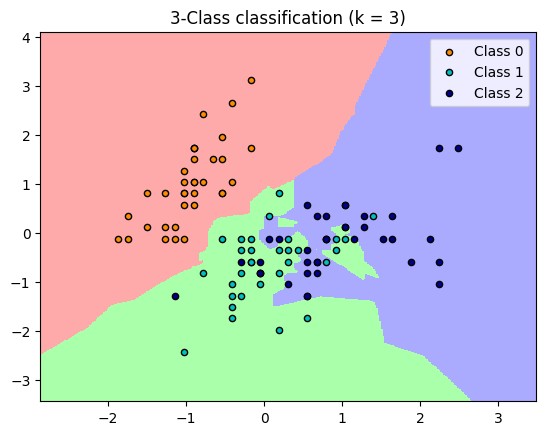

Accuracy on test set: 0.7333333333333333


In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import tensorflow as tf

# Učitavanje podataka i priprema
df = pd.read_csv('iris.csv')
df = df[['sepal_length', 'sepal_width', 'species']].dropna()

x = StandardScaler().fit_transform(df[['sepal_length', 'sepal_width']])
y = LabelEncoder().fit_transform(df['species'])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y)

# Definicija KNN klase
class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        y_pred = []
        for x in X:
            distances = tf.sqrt(tf.reduce_sum(tf.square(tf.subtract(self.X_train, x)), axis=1))
            _, indices = tf.nn.top_k(-distances, self.k)
            k_nearest_labels = tf.gather(self.y_train, indices)
            y_pred.append(np.argmax(np.bincount(k_nearest_labels)))
        return np.array(y_pred)

    def accuracy(self, X, y):
        y_pred = self.predict(X)
        return np.mean(y_pred == y)

# Vizualizacija granica odlučivanja
def plot_decision_boundaries(X, y, model):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ['darkorange', 'c', 'darkblue']

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, .02), np.arange(y_min, y_max, .02))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    for i, color in zip(range(3), cmap_bold):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=f'Class {i}', edgecolor='black', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i)" % model.k)
    plt.legend()
    plt.show()

# Kreiranje i treniranje KNN modela
knn = KNN(k=3)
knn.fit(x_train, y_train)

# Plotovanje granica odlučivanja koristeći trening skup
plot_decision_boundaries(x_train, y_train, knn)

# Izračunavanje i prikazivanje tačnosti na test skupu
test_accuracy = knn.accuracy(x_test, y_test)
print(f'Accuracy on test set: {test_accuracy}')